In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [101]:
def read_datafile(filename):
    df = pd.read_csv(filename,delimiter='\s+')
    X = df.values
    return X

In [102]:
X = read_datafile('blobs.txt')
X

array([[-4.76661, -6.87944],
       [-6.67986, -5.8308 ],
       [-8.93021, -4.15571],
       ...,
       [ 6.91832, -0.32132],
       [-8.23828, -4.00405],
       [-5.75112, -5.99531]])

In [103]:
#BSAS Implementation

def euclidian(a,b):
    return np.sum((a-b)**2,axis=0)

def BSAS(X):
    np.random.shuffle(X)

    m = 1
    clusters = [[X[0],[X[0]]]]
    threshold = 1
    q = 2

    N = len(X)
    for i in range(1,N):
        min_val = 2e10
        curr = -1
        for k in range(m):
            dist = euclidian(X[i],clusters[k][0])
            if min_val > dist:
                min_val = dist
                curr = k

        if min_val > threshold and m<q:
            clusters.append([X[i],[X[i]]])
            m += 1
        else:
            clusters[curr][0] = (len(clusters[curr][1])*clusters[curr][0] + X[i])/(len(clusters[curr][1])+1)
            clusters[curr][1].append(X[i])

    return clusters

clusters = BSAS(X)

In [104]:
def plot(clusters):
    for k in range(len(clusters)):
        rgb = (random.random(), random.random(), random.random())
        for each in clusters[k][1]:
            plt.scatter(each[0],each[1],c=[rgb])

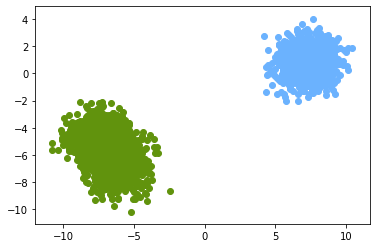

In [105]:
plot(BSAS(X))